Step 1: Import Libraries
First, we need to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
#StandardScaler is a class in the scikit-learn library that can be used to standardize features in a dataset
# it will transform the data so that each feature has a mean of 0 and a standard deviation of 1.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# For reproducibility
np.random.seed(42)


Step 2: Load the Dataset
Load the dataset and take a quick look at it.

In [2]:
# Load the dataset
df = pd.read_csv('/content/archive (19).zip')

# Display the first few rows of the dataset
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Step 3: Data Preprocessing
Standardize the features and handle class imbalance.

In [3]:
# Standardize the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop the 'Time' column as it is not relevant for our analysis
df = df.drop(columns=['Time'])

# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4: Train an Isolation Forest Model
Train the Isolation Forest model to detect anomalies.

In [4]:
# Initialize the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model
model.fit(X_train)

# Predict the anomalies in the test set
y_pred = model.predict(X_test)

# Convert the predictions: anomalies are labeled as -1, so we need to map them to 1 for fraud
y_pred = np.where(y_pred == -1, 1, 0)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Confusion Matrix:
[[54683  2181]
 [   20    78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.80      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.88      0.52     56962
weighted avg       1.00      0.96      0.98     56962


Accuracy: 0.96136020504898
Precision: 0.034528552456839307
Recall: 0.7959183673469388
F1 Score: 0.06618582944420874


Step 5: Visualize the Results
Visualize the confusion matrix to understand the performance better.

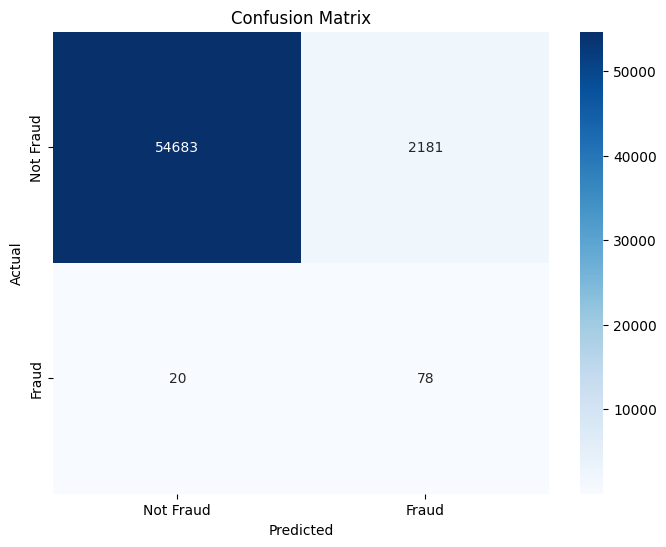

In [5]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
